<a href="https://colab.research.google.com/github/Nabeel110/Deep-Learning/blob/master/Boston_House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow --upgrade

     |████████████████████████████████| 421.8MB 32kB/s 
     |████████████████████████████████| 450kB 37.5MB/s 
     |████████████████████████████████| 3.8MB 40.5MB/s 
     |████████████████████████████████| 81kB 10.3MB/s 
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstal

In [0]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models, layers, optimizers, utils
import numpy as np
import matplotlib.pyplot as plt

In [22]:
len(train_data)

404

In [23]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()
print('Train Data Shape: ',train_data.shape)
print('Test Data Shape: ',test_data.shape)
print('Targets :', train_labels)

Train Data Shape:  (404, 13)
Test Data Shape:  (102, 13)
Targets : [15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.

In [24]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [25]:
train_labels[0]

15.2

In [26]:
train_data.shape

(404, 13)

# Preparing Data

In [0]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -=mean
test_data /= std

In [28]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

# Model Architecture

In [0]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation = 'relu', input_shape= (train_data.shape[1],)))
  model.add(layers.Dense(64, activation = 'relu',))
  model.add(layers.Dense(1)) # in Regression problem we dont put any activation function on last layer
  model.compile(optimizer = 'rmsprop', loss ='mse', metrics =['mae']) # for regression we use mse as loss fuction and mae as metrics
  return model

# K-Fold validation

In [42]:
num_epochs = 100
all_scores = []
all_mae_histories = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
  [train_data[:i * num_val_samples],
  train_data[(i + 1) * num_val_samples:]],
  axis=0)
  partial_train_targets = np.concatenate(
  [train_labels[:i * num_val_samples],
  train_labels[(i + 1) * num_val_samples:]],
  axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
  validation_data=(val_data, val_targets),
  epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)
  mae_history = history.history['val_mean_absolute_error']
  all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


# Errors

In [43]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
print('All fold validation Errors: ', all_scores)
print('Mean of All fold Validation Errors: ', np.mean(all_scores))
print('Average MAE History: ', average_mae_history)

All fold validation Errors:  [2.0363016, 2.674207, 2.6426876, 2.3738408]
Mean of All fold Validation Errors:  2.4317594
Average MAE History:  [4.4970803, 3.1560304, 2.9240105, 2.9726481, 2.7817113, 2.5872688, 2.715385, 2.6648922, 2.5943708, 2.5870252, 2.6298046, 2.5495846, 2.615529, 2.5036998, 2.512813, 2.4534698, 2.4993434, 2.47126, 2.5811, 2.502676, 2.2482555, 2.3844535, 2.4169655, 2.4169626, 2.4496613, 2.383299, 2.3863063, 2.3220294, 2.2649813, 2.3997877, 2.4152606, 2.4123347, 2.4221206, 2.354045, 2.5027733, 2.5086665, 2.4962213, 2.3772504, 2.4161565, 2.3295362, 2.2488663, 2.4147801, 2.3846676, 2.3971343, 2.3578267, 2.4349027, 2.4221811, 2.3645961, 2.5522983, 2.4005413, 2.3272338, 2.3247888, 2.4330883, 2.4426742, 2.4483335, 2.2710085, 2.4654768, 2.4591725, 2.3349628, 2.3618593, 2.4580812, 2.476307, 2.3875988, 2.4529827, 2.5825953, 2.5547688, 2.3948076, 2.3056428, 2.4046931, 2.570894, 2.4204895, 2.320788, 2.5293064, 2.5832946, 2.3352003, 2.3314505, 2.3841856, 2.5301032, 2.2680545, 2.

In [44]:
[len(x) for x in all_mae_histories]

[100, 100, 100, 100]

# Plotting Error

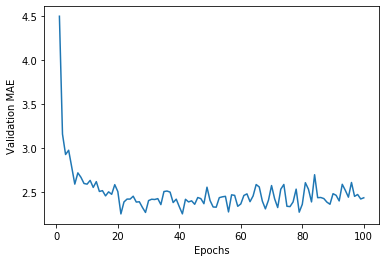

In [53]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

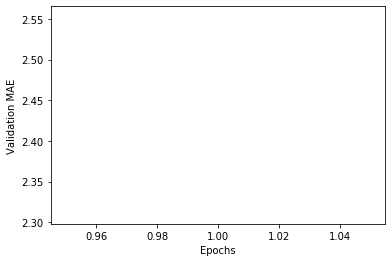

In [54]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
  else:
    smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# Final Training and Validating on Complete Dataset

In [55]:
model = build_model()
model.fit(train_data, train_labels, epochs = 80, batch_size =16, verbose = 0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print(test_mae_score)

102/102 [==============================] - 0s 1ms/sample - loss: 15.0531 - mean_absolute_error: 2.5217
2.5217235
